In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

In [3]:
def method2plotstr(method):
    if method == "p":
        return r"p = 2"
    parts = method.split("-")
    if len(parts) > 1:
        p = int(parts[-1])
        return fr"p = {p}"
    return method

In [19]:
markers= ['.', '*', 'o', '^', 'v', 's']

def plot_results(dataset, pkl_fname, to_plot=['passive', 'greedy', 'p', 'p-1', 'p-5'], save=False, savedir="./figures/"):
    with open(pkl_fname, "rb") as f:
        data = pickle.load(f)
        
    xmax = 16
    xtick_step = 2
    fig, ax = plt.subplots(figsize=(8,3))
    for i, method in enumerate(to_plot):
        if method not in data:
            print(f"Could not find {method} in dictionary")
        d = data[method]
        vals = np.array([list(ev[:xmax]) for ev in d['energy_values']])
        mean_vals = vals.mean(axis=0)
        std_vals = vals.std(axis=0)
        l = ax.semilogy(range(1, xmax+1), mean_vals, linewidth=1.7, marker=markers[i], label=fr"{method2plotstr(method)}")
        #ax.fill_between(range(1, xmax+1), mean_vals - std_vals, mean_vals + std_vals, alpha=0.2, color=l[0].get_color())
    ax.legend()
    xticks = [i for i in range(xmax+1) if i % xtick_step == 0]
    ax.set_xticks(xticks)
    ax.set_ylabel(r'$\|X - WH\|_F^2 / \|X\|_F^2$', fontsize=12)
    ax.set_xlabel(r'$k$', fontsize=12)
    if save:
        if not os.path.exists(savedir):
            os.makedirs(savedir)
        plt.savefig(os.path.join(savedir, f"{dataset}_relerr.png"), format='png', dpi=500, bbox_inches='tight')
    plt.show()

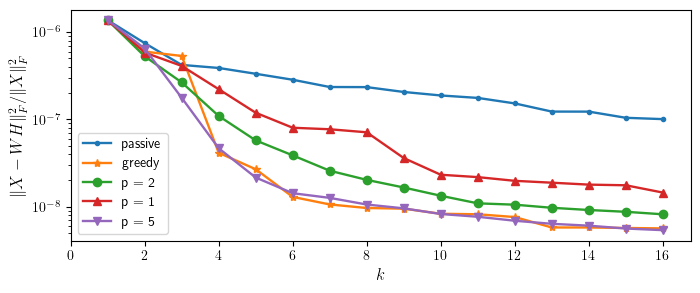

In [20]:
plot_results("pavia", "./results/pavia_cvx_k20_ns10_nla100.pkl", save=True)

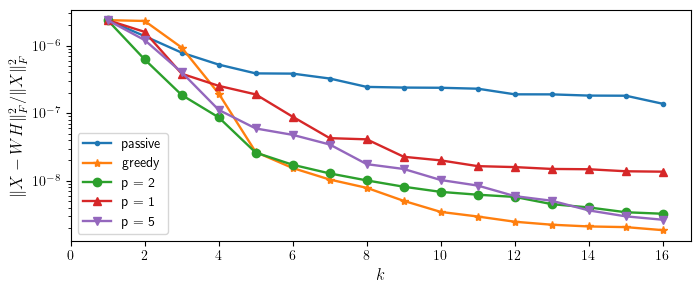

In [21]:
plot_results("salinas", "./results/salinas_cvx_k20_ns10_nla100.pkl", save=True)

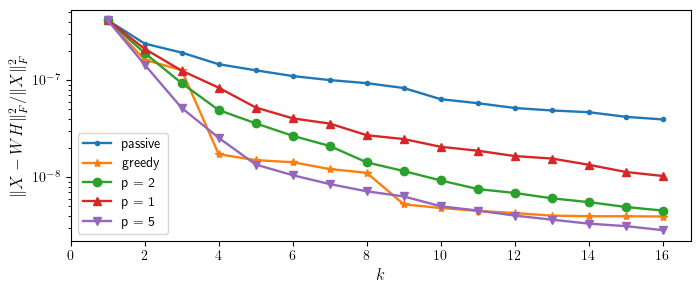

In [22]:
plot_results("urban", "./results/urban_cvx_k20_ns30_nla100.pkl", save=True)

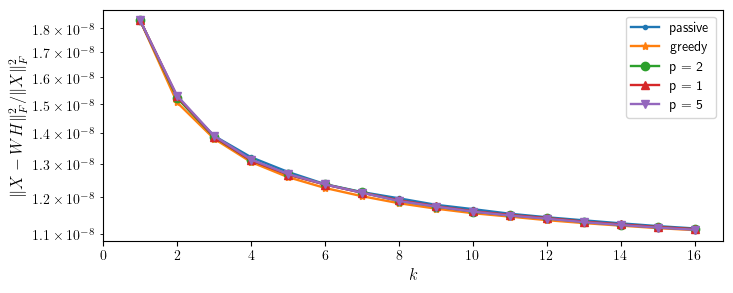

In [23]:
plot_results("snps", "./results_old/snp_cvx_k20_ns5_nla100_fpgm_all.pkl", save=True)